# Testing examples from hydroclimatology

In [1]:
# this block is for developing the module, comment out when using the module, and uncomment import easysnowdata
%load_ext autoreload
%autoreload 2
%aimport easysnowdata

In [2]:
#import easysnowdata
import geopandas as gpd
import xarray as xr
from easysnowdata.utils import convert_bbox_to_geodataframe
import json
import ee
import matplotlib.pyplot as plt
import numpy as np
import contextily as ctx
import rioxarray as rxr


In [3]:
ee.Authenticate()  # need to figure out https://developers.google.com/earth-engine/guides/auth
ee.Initialize(opt_url="https://earthengine-highvolume.googleapis.com")

In [4]:
bbox_gdf = gpd.read_file(
    "https://github.com/egagli/easysnowdata/raw/main/docs/examples/mt_rainier.geojson"
)

## [Koppen Geiger Climate Classification](https://figshare.com/articles/dataset/High-resolution_1_km_K_ppen-Geiger_maps_for_1901_2099_based_on_constrained_CMIP6_projections/21789074/1?file=45057352)

In [5]:
koppen_geiger_da = easysnowdata.hydroclimatology.get_koppen_geiger_classes(resolution="0.1 degree")
#koppen_geiger_da

No spatial subsetting because bbox_input was not provided.


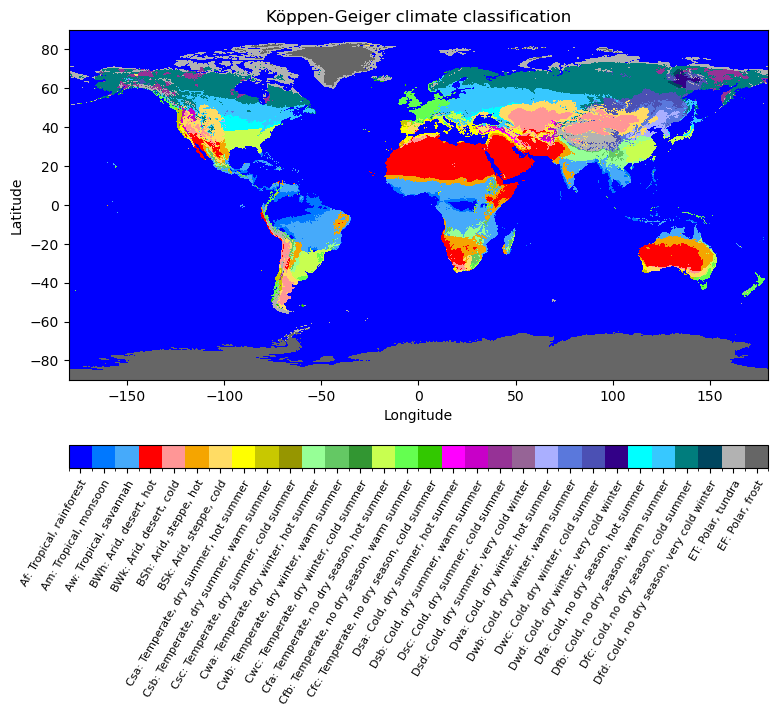

In [6]:
f,ax = koppen_geiger_da.attrs['example_plot'](koppen_geiger_da)

In [7]:
koppen_geiger_da = easysnowdata.hydroclimatology.get_koppen_geiger_classes(bbox_input=bbox_gdf,resolution="1 km")
#koppen_geiger_da

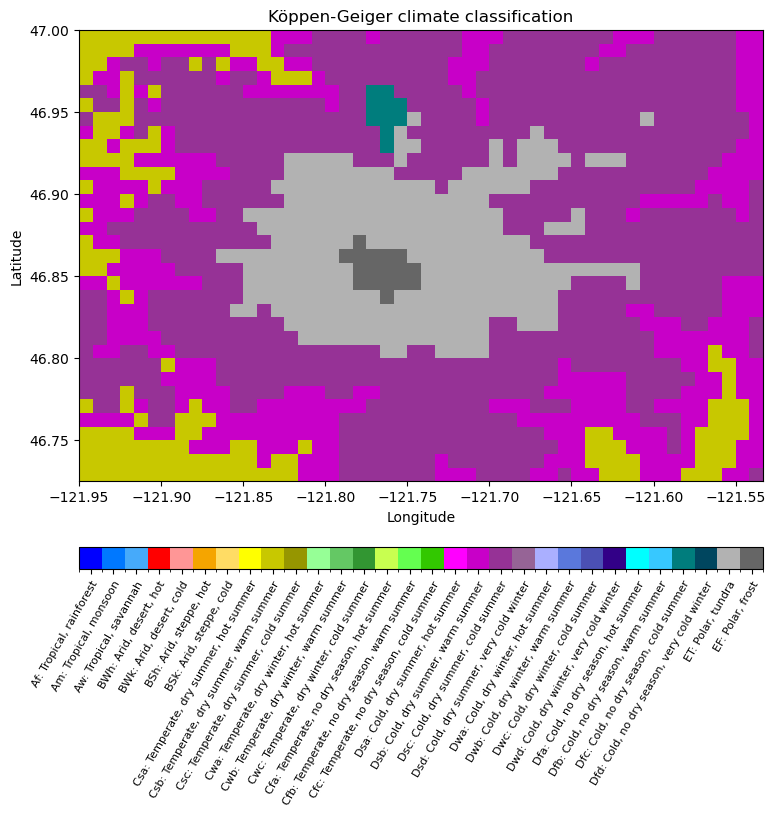

In [8]:
f,ax = koppen_geiger_da.attrs['example_plot'](koppen_geiger_da)

## [HUC02 geometries](https://developers.google.com/earth-engine/datasets/catalog/USGS_WBD_2017_HUC02)

This might take a moment...

In [9]:
huc02_gdf = easysnowdata.hydroclimatology.get_huc_geometries(huc_level="02")

No spatial subsetting because bbox_input was not provided.


In [10]:
# huc02_gdf.explore()

### Get HUC geometries given a bounding box

In [11]:
huc02_gdf = easysnowdata.hydroclimatology.get_huc_geometries(
    bbox_input=bbox_gdf, huc_level="02"
)
huc04_gdf = easysnowdata.hydroclimatology.get_huc_geometries(
    bbox_input=bbox_gdf, huc_level="04"
)
huc06_gdf = easysnowdata.hydroclimatology.get_huc_geometries(
    bbox_input=bbox_gdf, huc_level="06"
)
huc08_gdf = easysnowdata.hydroclimatology.get_huc_geometries(
    bbox_input=bbox_gdf, huc_level="08"
)
huc10_gdf = easysnowdata.hydroclimatology.get_huc_geometries(
    bbox_input=bbox_gdf, huc_level="10"
)
huc12_gdf = easysnowdata.hydroclimatology.get_huc_geometries(
    bbox_input=bbox_gdf, huc_level="12"
)

Text(0.5, 0.98, 'HUC geometries')

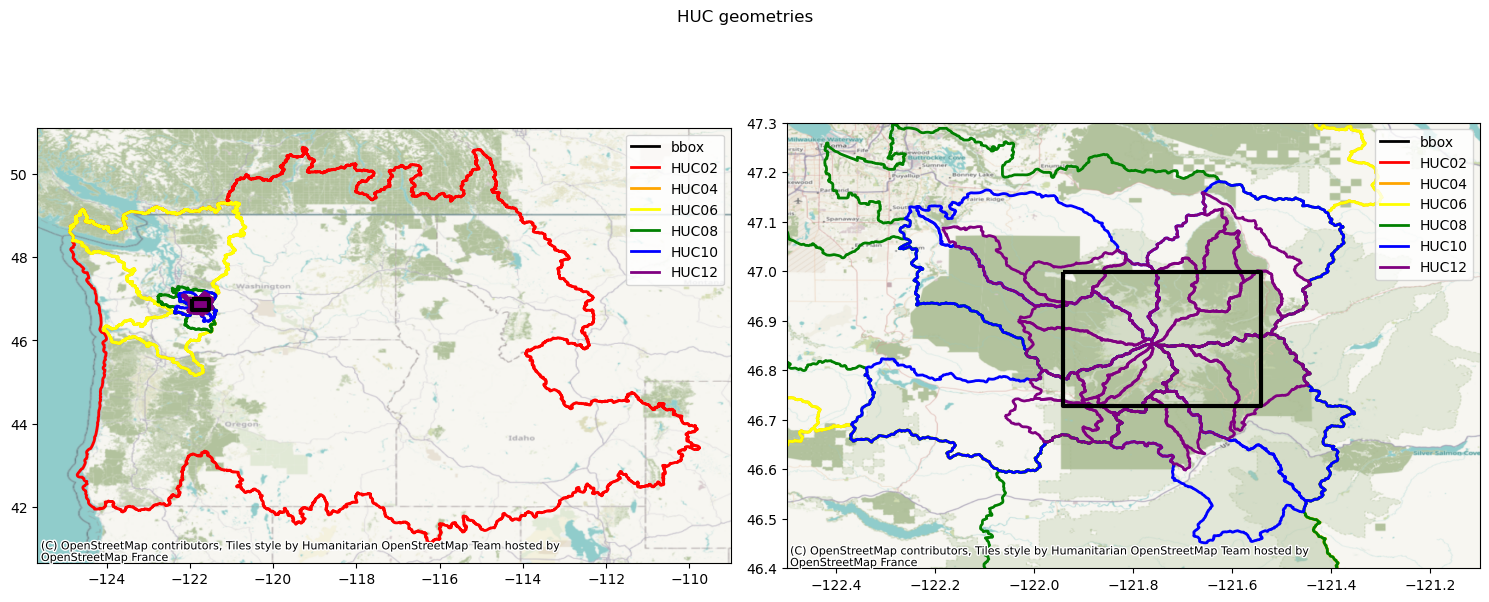

In [12]:
f, axs = plt.subplots(1, 2, figsize=(15, 7))

for ax in axs:
    huc02_gdf.plot(ax=ax, color="none", edgecolor="red", linewidth=2, label="HUC02")
    huc04_gdf.plot(ax=ax, color="none", edgecolor="orange", linewidth=2, label="HUC04")
    huc06_gdf.plot(ax=ax, color="none", edgecolor="yellow", linewidth=2, label="HUC06")
    huc08_gdf.plot(ax=ax, color="none", edgecolor="green", linewidth=2, label="HUC08")
    huc10_gdf.plot(ax=ax, color="none", edgecolor="blue", linewidth=2, label="HUC10")
    huc12_gdf.plot(ax=ax, color="none", edgecolor="purple", linewidth=2, label="HUC12")
    bbox_gdf.plot(ax=ax, color="none", edgecolor="black", linewidth=3, label="bbox")

ctx.add_basemap(axs[0], crs=huc02_gdf.crs)

axs[1].set_xlim(-122.5, -121.1)
axs[1].set_ylim(46.4, 47.3)
ctx.add_basemap(axs[1], crs=huc02_gdf.crs)


# Create a legend for the HUC levels
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color="black", lw=2, label="bbox"),
    Line2D([0], [0], color="red", lw=2, label="HUC02"),
    Line2D([0], [0], color="orange", lw=2, label="HUC04"),
    Line2D([0], [0], color="yellow", lw=2, label="HUC06"),
    Line2D([0], [0], color="green", lw=2, label="HUC08"),
    Line2D([0], [0], color="blue", lw=2, label="HUC10"),
    Line2D([0], [0], color="purple", lw=2, label="HUC12"),
]
for ax in axs:
    ax.legend(handles=legend_elements)

f.tight_layout()
f.suptitle("HUC geometries")

## [HydroBASINS geometries](https://www.hydrosheds.org/products/hydrobasins)

In [13]:
global_hydroBASINS_level4_gdf = easysnowdata.hydroclimatology.get_hydroBASINS(regions='all',level=4)

Getting geometries for Africa...
Africa takes a bit longer because we have to temporarily save the file due to read issue...
Getting geometries for Arctic...
Getting geometries for Asia...
Getting geometries for Australia...
Getting geometries for Europe...
Getting geometries for Greenland...
Getting geometries for North America...
Getting geometries for South America...
Getting geometries for Siberia...


Text(0.5, 1.0, 'Global HydroBASINS Level 4')

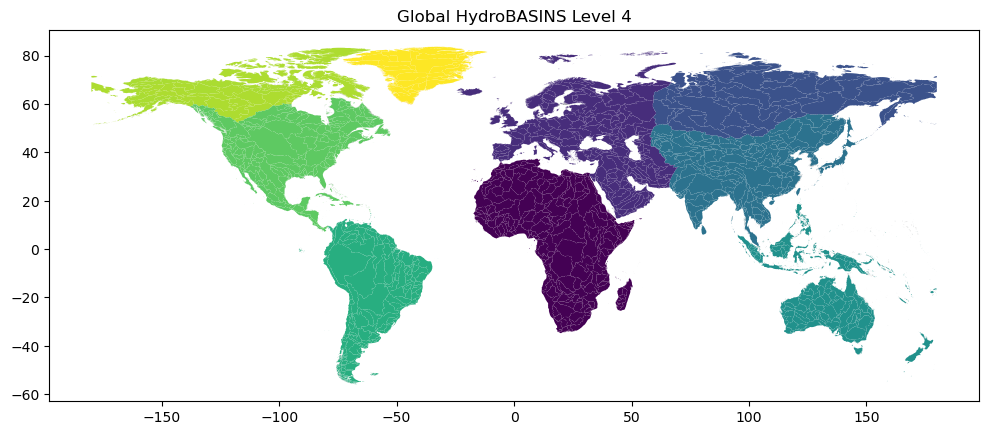

In [14]:
f,ax=plt.subplots(figsize=(12,7))
global_hydroBASINS_level4_gdf.plot(ax=ax,column='HYBAS_ID')
ax.set_title('Global HydroBASINS Level 4')

## [GDRC Major River Basins of the World](https://grdc.bafg.de/products/basin_layers/major_rivers/)

In [15]:
grdc_basins_gdf = easysnowdata.hydroclimatology.get_grdc_major_river_basins_of_the_world()

No spatial subsetting because bbox_input was not provided.


Text(0.5, 1.0, 'GRDC Major River Basins of the World')

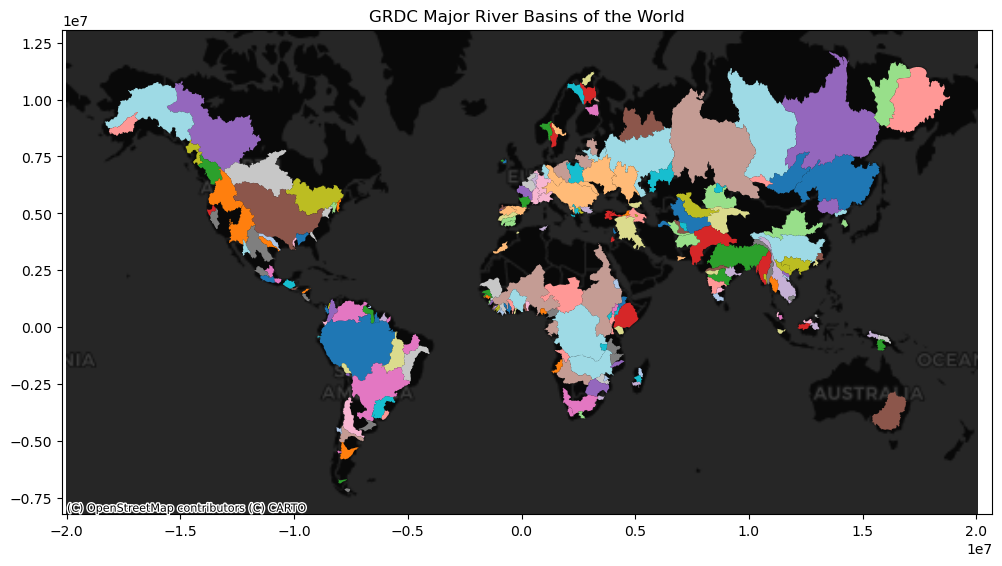

In [16]:
f, ax = plt.subplots(figsize=(12, 7))
grdc_basins_gdf.to_crs(epsg=3857).plot(ax=ax, column='NAME',cmap='tab20')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter)
ax.set_title("GRDC Major River Basins of the World")

## [ERA5 atmospheric reanalysis](https://cloud.google.com/storage/docs/public-datasets/era5)

In [17]:
era5_global_ds = easysnowdata.hydroclimatology.get_era5()

No spatial subsetting because bbox_input was not provided.


/home/eric/miniconda3/envs/easysnowdata/lib/python3.10/site-packages/xarray/core/indexing.py:1620: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


Text(0.5, 0.98, 'ERA5 2m Temperature on 2020-05-26')

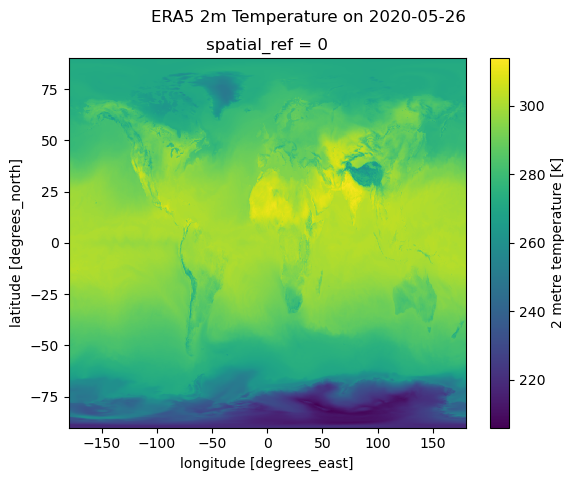

In [18]:
f, ax = plt.subplots()
era5_global_ds["2m_temperature"].sel(time="2020-05-26").mean(dim="time").plot.imshow(ax=ax)
f.suptitle("ERA5 2m Temperature on 2020-05-26")

In [19]:
era5_clipped_ds = easysnowdata.hydroclimatology.get_era5(bbox_gdf)

/home/eric/miniconda3/envs/easysnowdata/lib/python3.10/site-packages/xarray/core/indexing.py:1620: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


<Axes: title={'center': 'time = 2021-12-31T23:00:00, spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

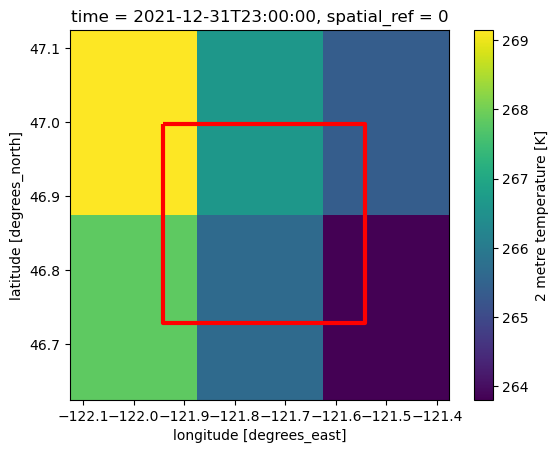

In [20]:
f, ax = plt.subplots()
era5_clipped_ds["2m_temperature"].isel(time=-1).plot.imshow(ax=ax)
bbox_gdf.plot(ax=ax, color="none", edgecolor="red", linewidth=3)

## [UCLA snow reanalysis](https://nsidc.org/data/wus_ucla_sr/versions/1)

In [21]:
snow_reanalysis_da = easysnowdata.hydroclimatology.get_ucla_snow_reanalysis(
    bbox_gdf,
    start_date="2020-10-01",
    end_date="2021-09-30",
    variable="SWE_Post",
    stats="mean",
)

Granules found: 2
Opening 2 granules, approx size: 0.33 GB


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

Text(0.5, 0.98, 'UCLA SWE reanalysis')

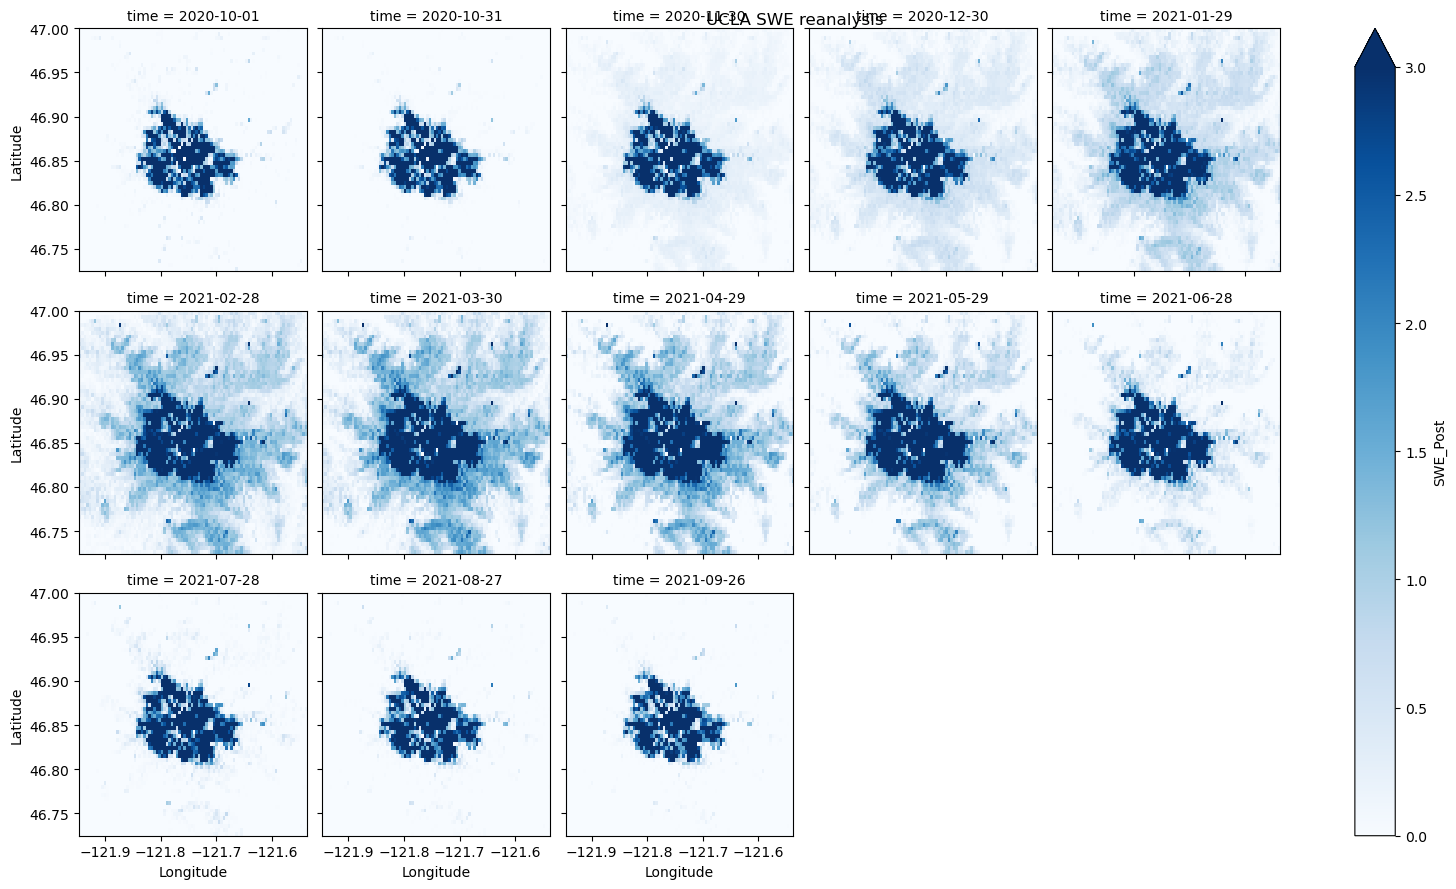

In [22]:
f = snow_reanalysis_da.isel(time=slice(0, 365, 30)).plot.imshow(
    col="time",
    col_wrap=5,
    cmap="Blues",
    vmin=0,
    vmax=3,
)

f.fig.suptitle("UCLA SWE reanalysis")